<a href="https://colab.research.google.com/github/ILMNX/pattern-recognition/blob/main/audio-object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
pip install pydub

In [34]:
pip install pandas

In [35]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
from pydub import AudioSegment
import pandas as pd

In [36]:
audio = AudioSegment.from_file("harvard.wav")
audio.export("audio.wav", format="wav")

<_io.BufferedRandom name='audio.wav'>

In [37]:
y, sr = librosa.load("audio.wav")

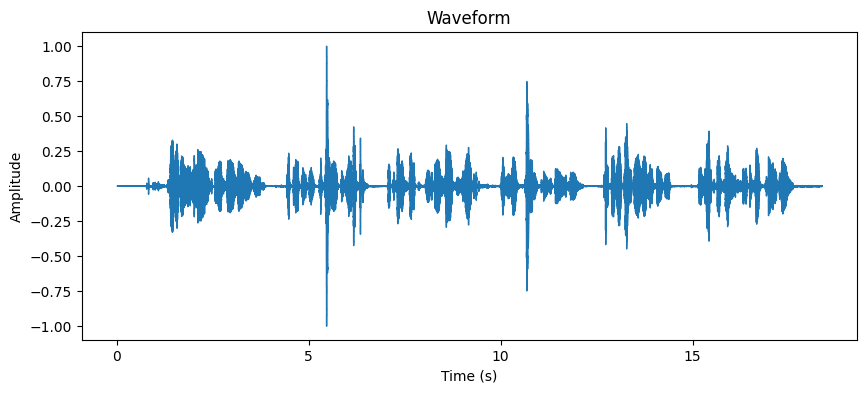

In [38]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [39]:
spectogram = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

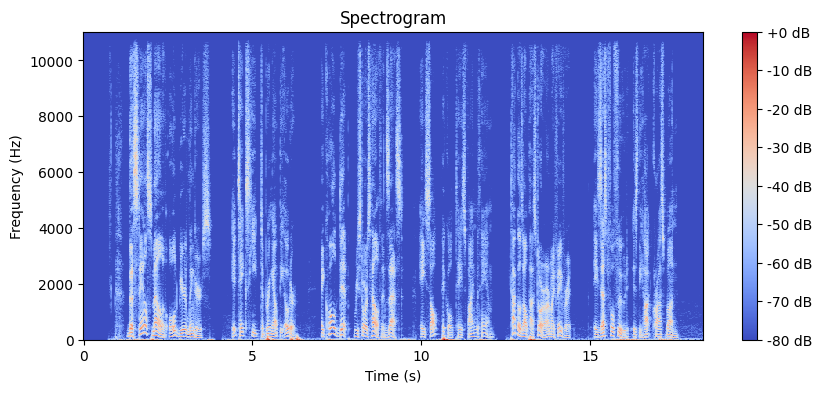

In [40]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectogram, sr=sr, x_axis='time', y_axis='hz', cmap='coolwarm')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [41]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

In [42]:
mfcc_df = pd.DataFrame(mfcc.T, columns=[f"MFCC_{i}" for i in range(1, 14)])
mfcc_df.to_csv("mfcc_features.csv", index=False)
print("Fitur MFCC telah disimpan ke file 'mfcc_features.csv'.")

Fitur MFCC telah disimpan ke file 'mfcc_features.csv'.


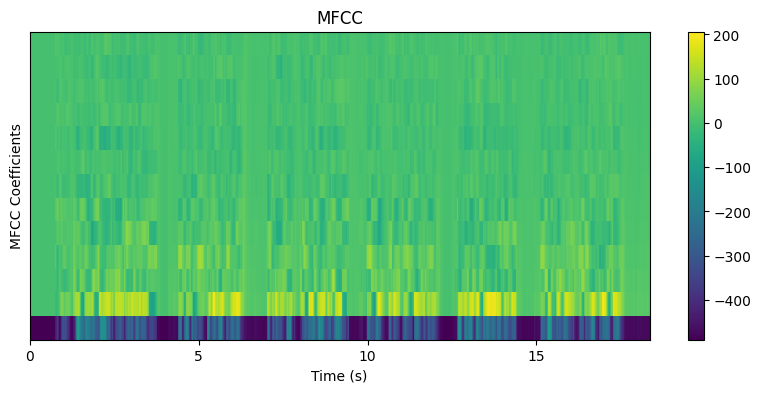

In [43]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap='viridis')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

In [44]:
pip install SpeechRecognition

In [45]:
import speech_recognition as sr

In [46]:
audio_file = "audio.wav"

In [47]:
recognizer = sr.Recognizer()

In [48]:
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)

In [49]:
try:
    text = recognizer.recognize_google(audio_data, language="us-US")
    print("Recognized Text:")
    print(text)
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")

Recognized Text:
the stale smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle taste fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun


In [50]:
pip install jiwer

In [51]:
from jiwer import wer

In [56]:
from logging import error
label = "the stale smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle taste fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun"

predicted_text = text

error = wer(label, predicted_text)
print(f"Word Error Rate (WER): {error}")

Word Error Rate (WER): 0.0


In [57]:
accuracy = 1 - error
print(f"Akurasi: {accuracy:.2f}")

Akurasi: 1.00


## TUGAS Pertemuan 10
Nama : Gilbert Hasiholan Sibuea \
NPM : 2217051118 \
Kelas : D \

1. Kode dimodifikasi untuk mengekstraksi MFCC kedalam bentuk **.csv** menggunakan library pandas

2. Audio menggunakan sample audio harvard.wav dari kaggle : https://www.kaggle.com/datasets/pavanelisetty/sample-audio-files-for-speech-recognition

3. Konsep Teori:
    * Kita menggunakan MFCC untuk pengenalan suara manusia karena konsep MFCC ini meniru cara telinga kita mendengar suara. Jadi, MFCC fokus lebih ke frekuensi rendah yang memang telinga kita lebih peka, tetapi tetap menangkap frekuensi tinggi juga. Selain itu, MFCC mengkompres data suara yang ribet jadi lebih sederhana tanpa kehilangan informasi penting, oleh sebab itu MFCC sangat bagus untuk analisis suara seperti deteksi atau pengenalan suara.
    * Waveform, spektrogram, dan MFCC itu beda cara kerjanya dan fokusnya.  \ **Waveform** menunjukkan perubahan amplitudo suara terhadap waktu, jadi kita bisa lihat energi suara naik turun, tetapi kurang jelas untuk analisis frekuensi. \
    Spektrogram, menggambarkan energi suara di berbagai frekuensi dan waktu dalam bentuk grafik warna, jadi lebih detail untuk memahami distribusi frekuensi suara. \
    Sementara itu, MFCC fokus pada meniru cara telinga manusia mendengar suara dengan menyederhanakan informasi spektral suara, sehingga lebih cocok untuk aplikasi seperti pengenalan suara atau analisis suara manusia.